# __LINEAR REGRESSION__

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/Advertising.csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# EXPLORATORY DATA ANALYSIS

In [7]:
data.shape

(200, 4)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


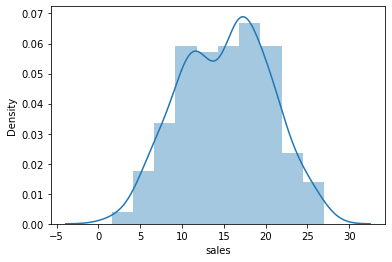

In [10]:
sns.distplot(data.sales);

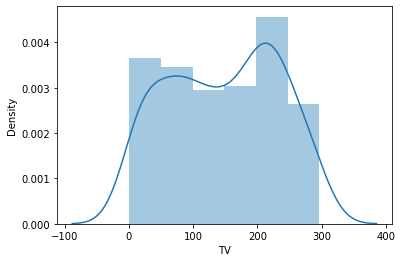

In [11]:
sns.distplot(data.TV);

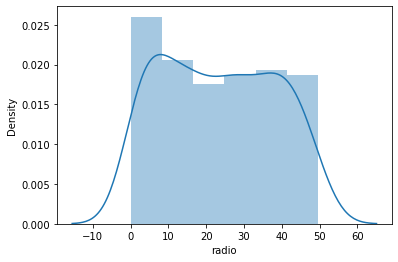

In [12]:
sns.distplot(data.radio);

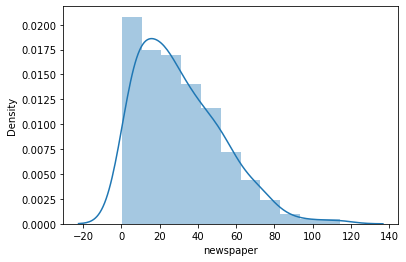

In [13]:
sns.distplot(data.newspaper);

__OBSERVATION:__ 

Sales used to be normally distributed. 

Spend on newspaper is right skewed.Most of the people spend less on newspaper.

TV and Radio are normally distributed.


In [14]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


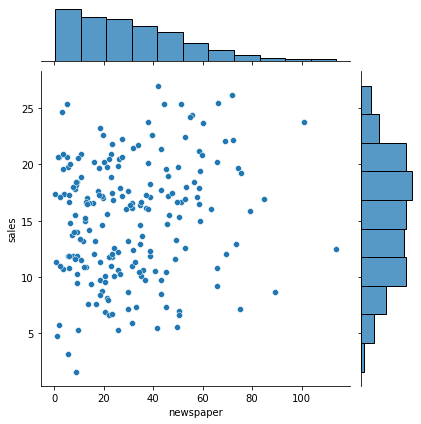

In [15]:
sns.jointplot("newspaper","sales",data=data);

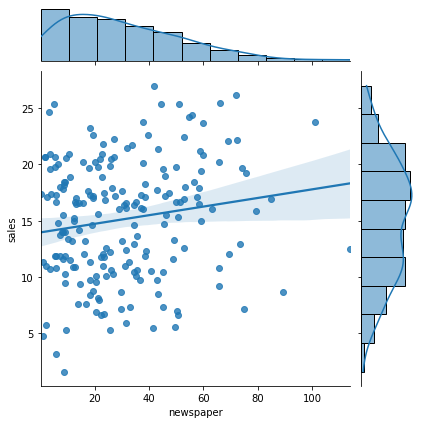

In [16]:
sns.jointplot("newspaper","sales",data=data, kind='reg');

__OBSERVATION:__

NO CORRELATION BETWEEN NEWSPAPER AND SALES

Newspaper is least PREDICTIVE IN SALES


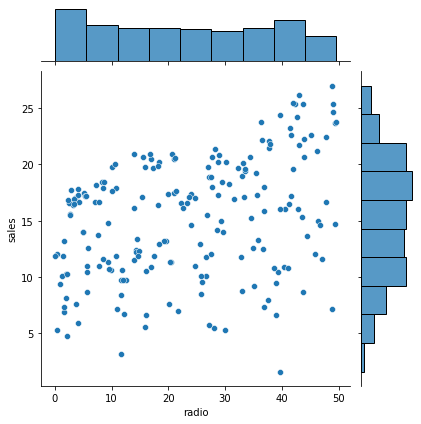

In [17]:
sns.jointplot("radio","sales",data=data);

__OBSERVATION:__

Some relationship BETWEEN radio AND SALES.

Radio is LIGHTLHY PREDICTIVE IN SALES

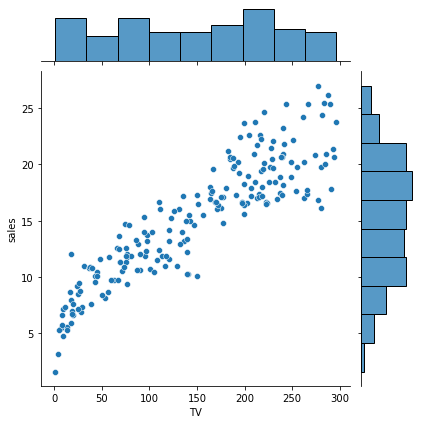

In [18]:
sns.jointplot("TV","sales",data=data);

__OBSERVATION:__

Positive correlation relationship BETWEEN TV AND SALES.

TV is HIGHLY PREDICTIVE IN SALES

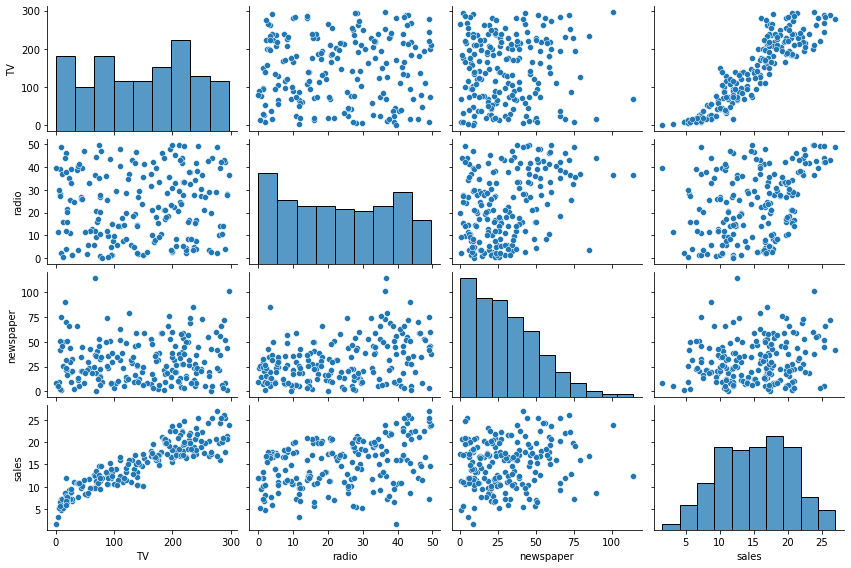

In [19]:
sns.pairplot(data, size=2, aspect=1.5);

__OBSERVATION:__
    
___We always want a high correlation between independent variable and dependent variable.THe more high it is , the better is the feature for predicting the Target Variable.___

___However, there must be least correlation between any two Independent variables. If any independent variables have high positive or high negative correlation, then it leads to a major issue in ML ehich is called___ __MULTI LINEARITY__.

___If we find two Independent variables with high positive or high negative correlation then we remove any one of the Independent Variable.___

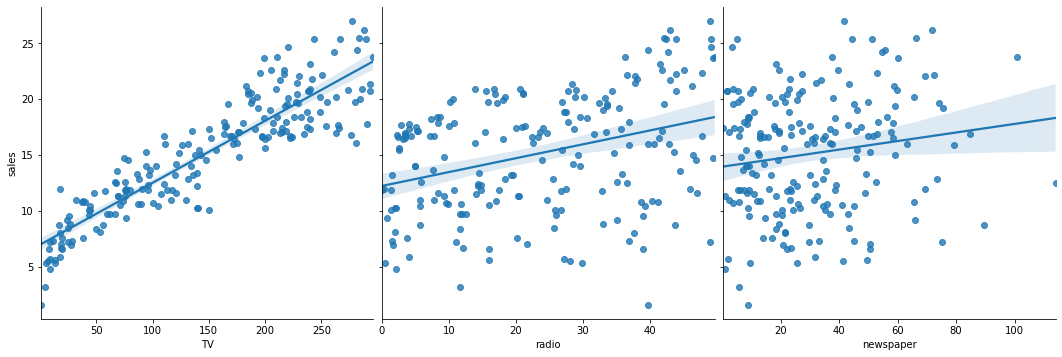

In [20]:
sns.pairplot(data, x_vars = ['TV','radio','newspaper'], y_vars ='sales',size = 5,aspect = 1, kind='reg');

In [21]:
cor =data.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.901208
radio,0.054809,1.000000,0.354104,0.349631
newspaper,0.056648,0.354104,1.000000,0.157960
sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

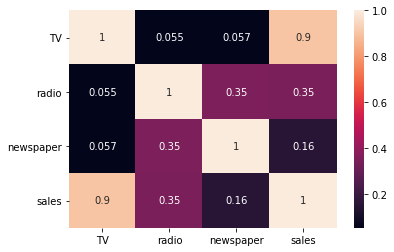

In [22]:
sns.heatmap(cor, annot=True)

# MACHINE LEARNING PROBLEM

## DATA PREPARATION

In [23]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [24]:
#segegate x  = tv radio and newspaper is 0,1,2 and y = sales is 3

In [25]:
x = data.iloc[:,:-1]
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [26]:
#segregate y
y = data.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: sales, Length: 200, dtype: float64

In [27]:
x.shape

(200, 3)

In [28]:
y.shape

(200,)

In [29]:
# Not a part of Linear Regression

import random 
print(random.random())

#generates random numbers every time it is executed

0.16273355829253966


In [47]:
for i in range(20):
    print(random.random(), end = " | ")

0.420571580830845 | 0.25891675029296335 | 0.5112747213686085 | 0.4049341374504143 | 0.7837985890347726 | 0.30331272607892745 | 0.4765969541523558 | 0.5833820394550312 | 0.9081128851953352 | 0.5046868558173903 | 0.28183784439970383 | 0.7558042041572239 | 0.6183689966753316 | 0.25050634136244054 | 0.9097462559682401 | 0.9827854760376531 | 0.8102172359965896 | 0.9021659504395827 | 0.3101475693193326 | 0.7298317482601286 | 

In [48]:
import random 
random.seed(0)
print(random.random())

0.8444218515250481


In [49]:
import random 
random.seed(11)
print(random.random())

0.4523795535098186


In [52]:
import random 
random.seed(1001)
print(random.random())

0.7966509679599704


In [53]:
import random 
random.seed(5)
print(random.random())

0.6229016948897019


In [54]:
#same answers because of seed values - reproduce the same result

In [55]:
x.shape

(200, 3)

In [56]:
y.shape

(200,)

# SPLITTING X AND y INTO TRAINING AND TESTING DATA

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [104]:
x_train.shape

(160, 3)

In [105]:
x_test.shape

(40, 3)

In [106]:
y_train.shape

(160,)

In [107]:
y_test.shape

(40,)

In [108]:
x_train.head()

,TV,radio,newspaper
101,296.4,36.3,100.9
109,255.4,26.9,5.5
5,8.7,48.9,75.0
67,139.3,14.5,10.2
194,149.7,35.6,6.0


In [109]:
x_train.tail()

,TV,radio,newspaper
89,109.8,47.8,51.4
23,228.3,16.9,26.2
162,188.4,18.1,25.6
15,195.4,47.7,52.9
32,97.2,1.5,30.0


In [119]:
y_train

134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: sales, Length: 160, dtype: float64

In [112]:
x_test.head()

,TV,radio,newspaper
154,187.8,21.1,9.5
122,224.0,2.4,15.6
20,218.4,27.7,53.4
145,140.3,1.9,9.0
60,53.5,2.0,21.4


In [111]:
y_train.tail()

89     16.7
23     20.5
162    19.9
15     22.4
32     13.2
Name: sales, dtype: float64

In [113]:
y_test.head()

154    20.6
122    16.6
20     18.0
145    10.3
60      8.1
Name: sales, dtype: float64

In [118]:
#using Random state to give vthe seed value

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [115]:
x_train.head()

,TV,radio,newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6


In [116]:
x_train.tail()

,TV,radio,newspaper
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5
172,19.6,20.1,17.0


In [117]:
x_test.head()

,TV,radio,newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2


In [120]:
y_train

134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: sales, Length: 160, dtype: float64

In [121]:
y_train.tail()

67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: sales, dtype: float64

In [122]:
y_test.head()

18     11.3
170     8.4
107    12.0
98     25.4
177    16.7
Name: sales, dtype: float64

__OBSERVATIONS:__

___sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)___

___why to use random_sate? shuffled and randomly picked up.___ Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. 

___Not mandatorry to keep test_size to 0.2. It is good to have train size atleast twice that of test size___

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html